In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [2]:
df=pd.read_csv("C:\\Users\\SREE RAMULU\\Downloads\\archive (8)\\train.csv")

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df.shape

(8068, 11)

In [5]:
for col in df.columns:
    print(col,":",len(df[col].unique()),'labels')

ID : 8068 labels
Gender : 2 labels
Ever_Married : 3 labels
Age : 67 labels
Graduated : 3 labels
Profession : 10 labels
Work_Experience : 16 labels
Spending_Score : 3 labels
Family_Size : 10 labels
Var_1 : 8 labels
Segmentation : 4 labels


In [6]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [7]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [8]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,0,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,0,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,1,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,0,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [9]:
df['Ever_Married']=df['Ever_Married'].map({'No':0,'Yes':1})

In [10]:
df['Graduated']=df['Graduated'].map({'No':0,'Yes':1})

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [12]:
df['Profession']=labelencoder.fit_transform(df['Profession'])
df['Spending_Score']=labelencoder.fit_transform(df['Spending_Score'])
df['Segmentation']=labelencoder.fit_transform(df['Segmentation'])
df['Var_1']=labelencoder.fit_transform(df['Var_1'])

In [13]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0.0,22,0.0,5,1.0,2,4.0,3,3
1,462643,0,1.0,38,1.0,2,NaN,0,3.0,3,0
2,466315,0,1.0,67,1.0,2,1.0,2,1.0,5,1
3,461735,1,1.0,67,1.0,7,0.0,1,2.0,5,1
4,462669,0,1.0,40,1.0,3,NaN,1,6.0,5,0


In [14]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

In [15]:
df['Graduated']=df['Graduated'].replace(to_replace=0, value=np.nan)
df['Graduated']=df['Graduated'].astype(float)
mean=df['Graduated'].mean()
df['Graduated'].replace(np.nan,mean,inplace=True)

In [16]:
df['Family_Size']=df['Family_Size'].replace(to_replace=0, value=np.nan)
df['Family_Size']=df['Family_Size'].astype(float)
mean=df['Family_Size'].mean()
df['Family_Size'].replace(np.nan,mean,inplace=True)

In [17]:
df['Work_Experience']=df['Work_Experience'].replace(to_replace=0, value=np.nan)
df['Work_Experience']=df['Work_Experience'].astype(float)
mean=df['Work_Experience'].mean()
df['Work_Experience'].replace(np.nan,mean,inplace=True)

In [18]:
df['Graduated']=df['Graduated'].replace(to_replace=0, value=np.nan)
df['Graduated']=df['Graduated'].astype(float)
mean=df['Graduated'].mean()
df['Graduated'].replace(np.nan,mean,inplace=True)

In [19]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [20]:
df=df.drop(['Ever_Married','Graduated'],axis=1)

In [21]:
df.head()

,ID,Gender,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,22,5,1.000000,2,4.0,3,3
1,462643,0,38,2,3.885999,0,3.0,3,0
2,466315,0,67,2,1.000000,2,1.0,5,1
3,461735,1,67,7,3.885999,1,2.0,5,1
4,462669,0,40,3,3.885999,1,6.0,5,0


In [22]:
dfScaled=df.apply(zscore)
dfScaled.head(10)

,ID,Gender,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,-0.258250,0.909164,-1.284623,0.803692,-1.056448e+00,0.754462,0.767001,-0.807837,1.262581
1,-0.322213,-1.099912,-0.327151,-0.336418,3.251264e-16,-1.603013,0.099972,-0.807837,-1.371406
2,1.092695,-1.099912,1.408268,-0.336418,-1.056448e+00,0.754462,-1.234085,0.577566,-0.493410
3,-0.672087,0.909164,1.408268,1.563766,3.251264e-16,-0.424275,-0.567056,0.577566,-0.493410
4,-0.312195,-1.099912,-0.207467,0.043619,3.251264e-16,-0.424275,2.101059,0.577566,-1.371406
5,-0.832382,0.909164,0.750006,-1.096492,3.251264e-16,-1.603013,-0.567056,0.577566,0.384586
6,-1.280513,0.909164,-0.686203,0.803692,-1.056448e+00,0.754462,0.099972,0.577566,0.384586
7,0.334378,-1.099912,-0.626361,0.803692,-1.056448e+00,0.754462,0.099972,0.577566,1.262581
8,0.591775,-1.099912,1.049216,-0.336418,3.251264e-16,0.754462,0.099972,1.270267,1.262581
9,0.653812,-1.099912,0.690164,-1.096492,-1.056448e+00,-1.603013,0.767001,0.577566,0.384586


In [23]:
dfScaled.tail(10)

,ID,Gender,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8058,-1.080916,-1.099912,-0.746045,0.043619,3.251264e-16,0.754462,0.099972,-1.500538,-1.371406
8059,-1.289761,0.909164,-0.267309,0.803692,-3.243286e-01,0.754462,-0.567056,0.577566,1.262581
8060,0.051551,-1.099912,0.271270,-1.096492,3.251264e-16,-1.603013,2.101059,0.577566,-1.371406
8061,0.675005,0.909164,1.288584,-1.096492,3.251264e-16,-1.603013,-0.567056,0.577566,0.384586
8062,-0.183882,0.909164,-0.147625,-1.096492,3.251264e-16,-0.424275,1.434030,0.577566,-0.493410
8063,0.207607,0.909164,-1.284623,2.323840,3.251264e-16,0.754462,2.768088,-2.885941,1.262581
8064,0.464618,0.909164,-0.506677,0.423655,-3.243286e-01,0.754462,0.767001,-0.807837,1.262581
8065,0.742436,-1.099912,-0.626361,0.803692,-1.056448e+00,0.754462,-1.234085,0.577566,1.262581
8066,1.471854,-1.099912,-0.985413,0.803692,-1.056448e+00,0.754462,0.767001,0.577566,-0.493410
8067,-0.616601,0.909164,-0.386993,0.423655,3.251264e-16,-1.603013,0.099972,-0.807837,-0.493410


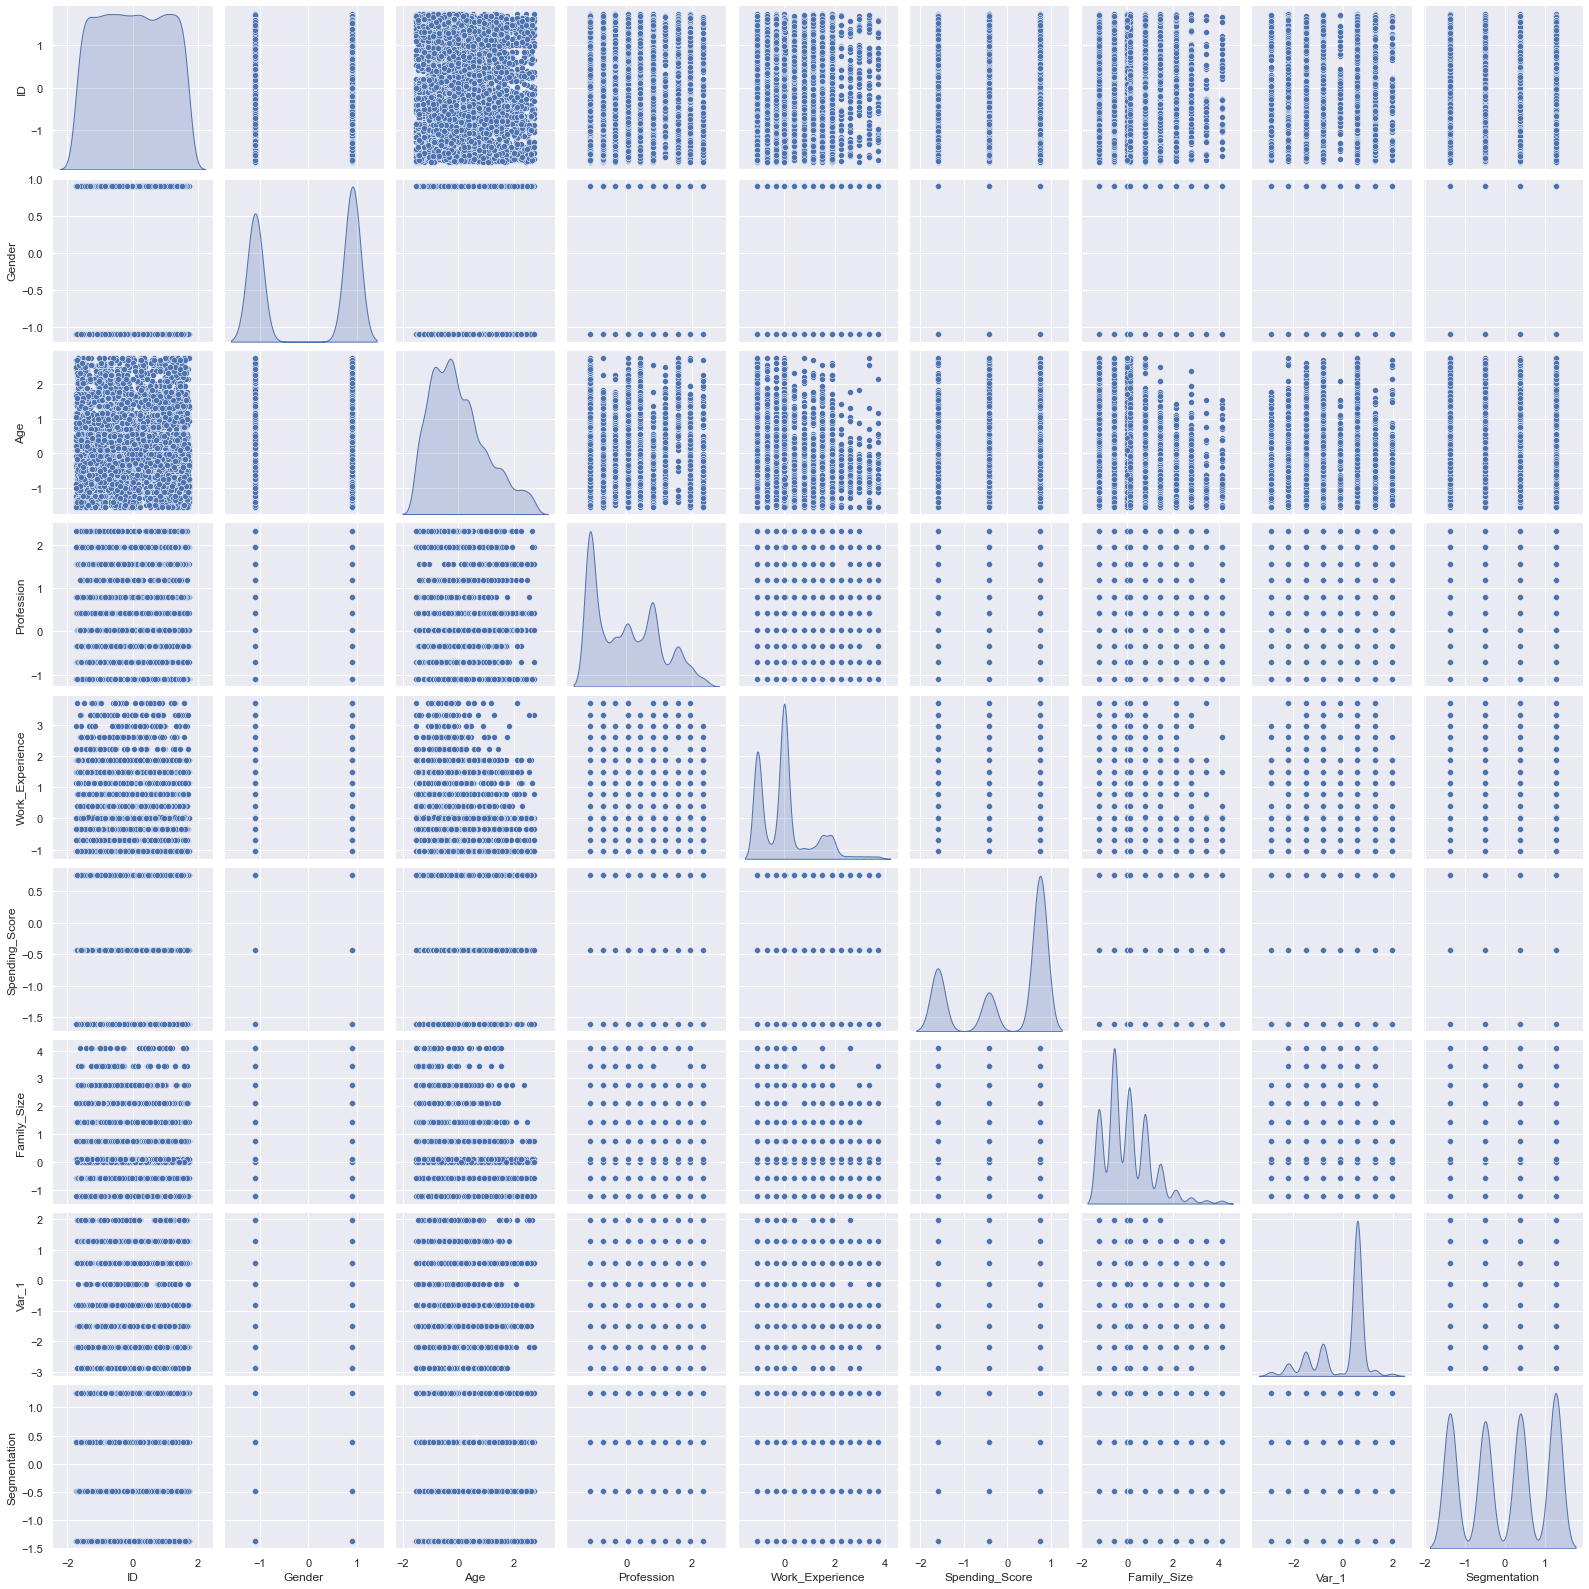

In [24]:
sns.pairplot(dfScaled,diag_kind='kde')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

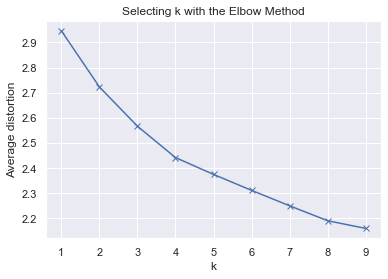

In [25]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
for k in clusters:
    m=KMeans(n_clusters=k)
    m.fit(dfScaled)
    prediction=m.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled,m.cluster_centers_,'euclidean'),axis=1))/dfScaled.shape[0])
    
plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [26]:
m1=KMeans(3)
m1.fit(dfScaled)
prediction=m1.predict(dfScaled)
df['group']=prediction
dfScaled['group']=prediction
print('Groups Assigned : \n')
df.head(15)

Groups Assigned : 



,ID,Gender,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,group
0,462809,1,22,5,1.000000,2,4.000000,3,3,0
1,462643,0,38,2,3.885999,0,3.000000,3,0,1
2,466315,0,67,2,1.000000,2,1.000000,5,1,2
3,461735,1,67,7,3.885999,1,2.000000,5,1,2
4,462669,0,40,3,3.885999,1,6.000000,5,0,1
5,461319,1,56,0,3.885999,0,2.000000,5,2,1
6,460156,1,32,5,1.000000,2,3.000000,5,2,0
7,464347,0,33,5,1.000000,2,3.000000,5,3,0
8,465015,0,61,2,3.885999,2,3.000000,6,3,2
9,465176,0,55,0,1.000000,0,4.000000,5,2,1


In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
m=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')

In [30]:
m.fit(dfScaled)

AgglomerativeClustering(linkage='average')

In [31]:
df['labels']=m.labels_
df.head(10)

,ID,Gender,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,group,labels
0,462809,1,22,5,1.000000,2,4.0,3,3,0,0
1,462643,0,38,2,3.885999,0,3.0,3,0,1,0
2,466315,0,67,2,1.000000,2,1.0,5,1,2,0
3,461735,1,67,7,3.885999,1,2.0,5,1,2,0
4,462669,0,40,3,3.885999,1,6.0,5,0,1,0
5,461319,1,56,0,3.885999,0,2.0,5,2,1,0
6,460156,1,32,5,1.000000,2,3.0,5,2,0,0
7,464347,0,33,5,1.000000,2,3.0,5,3,0,0
8,465015,0,61,2,3.885999,2,3.0,6,3,2,0
9,465176,0,55,0,1.000000,0,4.0,5,2,1,0


In [32]:
df1=df.groupby(['labels'])

In [33]:
df1.mean()

,ID,Gender,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,group
labels,,,,,,,,,,
0,463482.233995,0.546362,43.429677,2.887932,3.888828,1.364907,2.817396,4.171222,1.565207,1.078123
1,463039.309091,0.709091,48.890909,2.490909,3.473854,0.636364,7.618182,3.436364,1.090909,0.818182


In [34]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

In [35]:
z=linkage(dfScaled,metric='euclidean',method='average')
c,df=cophenet(z,pdist(dfScaled))
c

0.6170623657809983

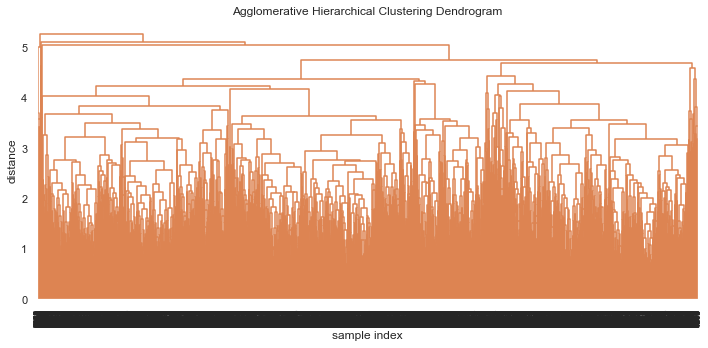

In [36]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z,leaf_rotation=90,color_threshold=40,leaf_font_size=8.)
plt.tight_layout()